In [2]:
import pandas as pd
import plotly as py
import numpy as np
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px

In [3]:
def generateDiscreteColourScale(colour_set):
    #colour set is a list of lists
    colour_output = []
    num_colours = len(colour_set)
    divisions = 1./num_colours
    c_index = 0.
    # Loop over the colour set
    for cset in colour_set:
        num_subs = len(cset)
        sub_divisions = divisions/num_subs
        # Loop over the sub colours in this set
        for subcset in cset:
            colour_output.append((c_index,subcset))
            colour_output.append((c_index + sub_divisions-
                .001,subcset))
            c_index = c_index + sub_divisions
    colour_output[-1]=(1,colour_output[-1][1])
    return colour_output

In [6]:
savedir = '/glade/campaign/univ/urtg0006/Brendan/GGCMI_model_comp_figs/protein'

In [7]:
maize = pd.read_excel(savedir + '/maize_clm_pchange_filter.xlsx', usecols="A,B")
maize_top = pd.read_excel(savedir + '/maize_clm_pchange_filter.xlsx', usecols="E,F")
rice = pd.read_excel(savedir + '/rice_clm_pchange_filter.xlsx', usecols="A,B")
rice_top = pd.read_excel(savedir + '/rice_clm_pchange_filter.xlsx', usecols="E,F")
soy = pd.read_excel(savedir + '/soy_clm_pchange_filter.xlsx', usecols="A,B")
soy_top = pd.read_excel(savedir + '/soy_clm_pchange_filter.xlsx', usecols="E,F")
wheat = pd.read_excel(savedir + '/wheat_clm_pchange_filter.xlsx', usecols="A,B")
wheat_top = pd.read_excel(savedir + '/wheat_clm_pchange_filter.xlsx', usecols="E,F")

In [16]:
color_schemes = [
    ['#a50026','#d73027','#f46d43','#fdae61','#fee08b','#ffffbf','#ffffbf','#d9ef8b','#a6d96a','#66bd63','#1a9850','#006837']]
cscale = generateDiscreteColourScale(color_schemes)

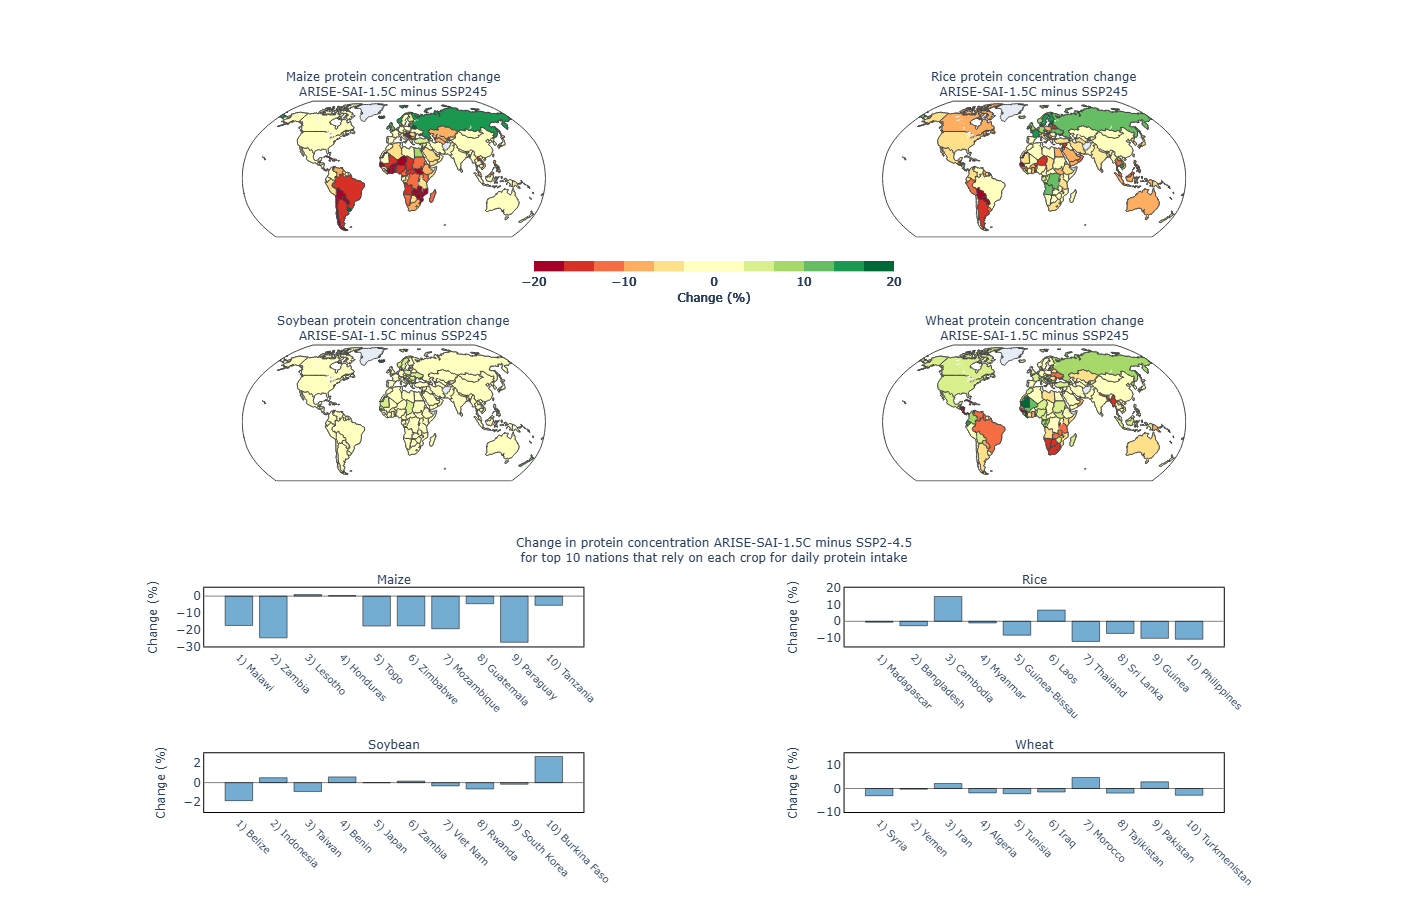

In [17]:
# Define subplots
fig = make_subplots(
    rows=4, cols=6,
    subplot_titles=("Maize protein concentration change<br>ARISE-SAI-1.5C minus SSP245","","", "Rice protein concentration change<br>ARISE-SAI-1.5C minus SSP245","","",
                    "Soybean protein concentration change<br>ARISE-SAI-1.5C minus SSP245","","", "Wheat protein concentration change<br>ARISE-SAI-1.5C minus SSP245","","",
                    "Maize","Rice",
                    "Soybean","Wheat"),
    specs=[[{"type": "choropleth", "colspan": 3},{},{}, {"type": "choropleth", "colspan": 3},{},{}],
           [{"type": "choropleth", "colspan": 3},{},{}, {"type": "choropleth", "colspan": 3},{},{}],
           [None,{"type": "bar"}, None, None, {"type": "bar"}, None],
           [None,{"type": "bar"}, None, None, {"type": "bar"}, None]],
    row_heights=[0.7, 0.7, 0.3, 0.3],
    column_widths=[0.25, 0.85, 0.25, 0.25, 0.85, 0.25],
    vertical_spacing=0.15,
    horizontal_spacing=0.01
)

# Add Barplots
fig.add_trace(go.Bar(x=maize_top['nation-name.1'], y=maize_top['pchange.1'], marker_color='#74add1',
                     marker=dict(line=dict(width=0.5, color='black')), showlegend=False), row=3, col=2)
fig.add_trace(go.Bar(x=rice_top['nation-name.1'], y=rice_top['pchange.1'], marker_color='#74add1',
                     marker=dict(line=dict(width=0.5, color='black')), showlegend=False), row=3, col=5)
fig.add_trace(go.Bar(x=soy_top['nation-name.1'], y=soy_top['pchange.1'], marker_color='#74add1',
                     marker=dict(line=dict(width=0.5, color='black')), showlegend=False), row=4, col=2)
fig.add_trace(go.Bar(x=wheat_top['nation-name.1'], y=wheat_top['pchange.1'], marker_color='#74add1',
                     marker=dict(line=dict(width=0.5, color='black')), showlegend=False), row=4, col=5)

# Add Choropleths
fig.add_trace(go.Choropleth(locations=maize['nation-name'], colorscale=cscale, z=maize["pchange"],
                            locationmode="country names", zmin=-20, zmax=20,
                            colorbar={'title': {'text': 'Change (%)', 'font': {'size': 12}}}), row=1, col=1)
fig.add_trace(go.Choropleth(locations=rice['nation-name'], colorscale=cscale, z=rice["pchange"],
                            locationmode="country names", zmin=-20, zmax=20,
                            colorbar={'title': {'text': 'Change (%)', 'font': {'size': 12}}}), row=1, col=4)
fig.add_trace(go.Choropleth(locations=soy['nation-name'], colorscale=cscale, z=soy["pchange"],
                            locationmode="country names", zmin=-20, zmax=20,
                            colorbar={'title': {'text': 'Change (%)', 'font': {'size': 12}}}), row=2, col=1)
fig.add_trace(go.Choropleth(locations=wheat['nation-name'], colorscale=cscale, z=wheat["pchange"],
                            locationmode="country names", zmin=-20, zmax=20,
                            colorbar={'title': {'text': 'Change (%)', 'font': {'size': 12}}}), row=2, col=4)

# Update layout settings
fig.update_geos(projection_type="robinson", lataxis_range=[-60, 80])
fig.update_traces(colorbar_title_side='bottom', colorbar_orientation='h', colorbar_thickness=10,
                  colorbar_x=0.5, colorbar_y=0.7, colorbar_len=0.3, row=1, col=1)
fig.update_traces(colorbar_title_side='bottom', colorbar_orientation='h', colorbar_thickness=10,
                  colorbar_x=0.5, colorbar_y=0.7, colorbar_len=0.3, row=1, col=4)
fig.update_traces(colorbar_title_side='bottom', colorbar_orientation='h', colorbar_thickness=10,
                  colorbar_x=0.5, colorbar_y=0.7, colorbar_len=0.3, row=2, col=1)
fig.update_traces(colorbar_title_side='bottom', colorbar_orientation='h', colorbar_thickness=10,
                  colorbar_x=0.5, colorbar_y=0.7, colorbar_len=0.3, row=2, col=4)

fig.update_yaxes(title_font=dict(size=12), title_text="Change (%)", row=3, col=2)
fig.update_yaxes(title_font=dict(size=12), title_text="Change (%)", row=3, col=5)
fig.update_yaxes(title_font=dict(size=12), title_text="Change (%)", row=4, col=2)
fig.update_yaxes(title_font=dict(size=12), title_text="Change (%)", row=4, col=5)
fig.update_xaxes(tickangle=45)
fig.update_xaxes(tickfont_size=10, row=3, col=2)
fig.update_xaxes(tickfont_size=10, row=3, col=5)
fig.update_xaxes(tickfont_size=10, row=4, col=2)
fig.update_xaxes(tickfont_size=10, row=4, col=5)
fig.update_layout(width=800, height=900)
fig.update_layout(plot_bgcolor='white')

fig.update_yaxes(range=[-30, 5], row=3, col=2)
fig.update_yaxes(range=[-15, 20], row=3, col=5)
fig.update_yaxes(range=[-3, 3], row=4, col=2)
fig.update_yaxes(range=[-10, 15], row=4, col=5)

fig.update_layout(
    shapes=[
        # Line for Maize plot (row 1, col 1)
        dict(
            type="line",
            x0=-1, x1=10,  # Start and end of the line along the x-axis
            y0=0, y1=0,  # Line position at y=0
            line=dict(color="black", width=0.5),
            xref="x9", yref="y9"  # Define the correct x and y axes for this subplot
        ),
        # Line for Rice plot (row 1, col 4)
        dict(
            type="line",
            x0=-1, x1=10,  # Start and end of the line along the x-axis
            y0=0, y1=0,  # Line position at y=0
            line=dict(color="black", width=0.5),
            xref="x10", yref="y10"  # Define the correct x and y axes for this subplot
        ),
        # Line for Soybean plot (row 3, col 1)
        dict(
            type="line",
            x0=-1, x1=10,  # Start and end of the line along the x-axis
            y0=0, y1=0,  # Line position at y=0
            line=dict(color="black", width=0.5),
            xref="x11", yref="y11"  # Define the correct x and y axes for this subplot
        ),
        # Line for Wheat plot (row 3, col 4)
        dict(
            type="line",
            x0=-1, x1=10,  # Start and end of the line along the x-axis
            y0=0, y1=0,  # Line position at y=0
            line=dict(color="black", width=0.5),xref="x12", yref="y12"
        )
    ]
)
#fig.update_xaxes(domain=[0.3, 0.3], row=2, col=2)

# Axis lines
fig.update_xaxes(showline=True, linecolor='black', linewidth=1, row=3, col=2, mirror=True)
fig.update_yaxes(showline=True, linecolor='black', linewidth=1, row=3, col=2, mirror=True)
fig.update_xaxes(showline=True, linecolor='black', linewidth=1, row=3, col=5, mirror=True)
fig.update_yaxes(showline=True, linecolor='black', linewidth=1, row=3, col=5, mirror=True)
fig.update_xaxes(showline=True, linecolor='black', linewidth=1, row=4, col=2, mirror=True)
fig.update_yaxes(showline=True, linecolor='black', linewidth=1, row=4, col=2, mirror=True)
fig.update_xaxes(showline=True, linecolor='black', linewidth=1, row=4, col=5, mirror=True)
fig.update_yaxes(showline=True, linecolor='black', linewidth=1, row=4, col=5, mirror=True)
fig.update_annotations(font_size=12)
fig.add_annotation(
    text="Change in protein concentration ARISE-SAI-1.5C minus SSP2-4.5<br>for top 10 nations that rely on each crop for daily protein intake",
    xref="paper", yref="paper",
    x=0.5, y=0.368,  # Position relative to the figure
    showarrow=False,
    font=dict(size=12)
)

In [22]:
fig.write_image(savedir+"/Nature_Fig2_3_CLM.png",scale=1)